# Gender Parity Analysis in Indian Education System

## Using Scatter Plot Visualizations for Policy-Relevant Insights

This notebook analyzes gender parity in student enrollment across Indian states and union territories using scatter plot visualizations. The analysis reveals critical insights about educational equity and provides data-driven recommendations for policy interventions.

**Dataset**: Enrollment of Students in Education across Indian States/UTs  
**Focus**: Gender parity analysis using Gender Parity Index (GPI)  
**Methodology**: Scatter plot analysis with statistical insights

## 1. Import Required Libraries

Let's start by importing all necessary libraries for data manipulation, visualization, and analysis.

In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set matplotlib and seaborn style
plt.style.use('default')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")
print("Libraries used:")
print("- pandas: Data manipulation and analysis")
print("- numpy: Numerical operations") 
print("- matplotlib: Static plotting")
print("- seaborn: Statistical visualization")
print("- plotly: Interactive visualizations")

✓ All libraries imported successfully!
Libraries used:
- pandas: Data manipulation and analysis
- numpy: Numerical operations
- matplotlib: Static plotting
- seaborn: Statistical visualization
- plotly: Interactive visualizations


## 2. Load and Explore the Dataset

Let's load the enrollment data and understand its structure.

In [15]:
# Load the dataset
df = pd.read_csv('Enrolment of Students in Education.csv')

# Display basic information about the dataset
print("📊 Dataset Overview")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Total States/UTs: {len(df)}")
print(f"Total Columns: {len(df.columns)}")

print("\n📋 Column Names (first 10):")
for i, col in enumerate(df.columns[:10]):
    print(f"{i+1:2d}. {col}")
print("    ... (and more)")

print("\n🎯 Data Types:")
print(df.dtypes.value_counts())

print("\n📊 First 3 rows:")
df.head(3)

📊 Dataset Overview
Shape: (36, 64)
Total States/UTs: 36
Total Columns: 64

📋 Column Names (first 10):
 1. State/UTs
 2. Pre-Primary  - Boys
 3. Pre-Primary  - Girls
 4. Pre-Primary  - Total
 5. Class I - Boys
 6. Class I - Girls
 7. Class I - Total
 8. Class II - Boys
 9. Class II - Girls
10. Class II - Total
    ... (and more)

🎯 Data Types:
int64     63
object     1
Name: count, dtype: int64

📊 First 3 rows:


,State/UTs,Pre-Primary - Boys,Pre-Primary - Girls,Pre-Primary - Total,Class I - Boys,Class I - Girls,Class I - Total,Class II - Boys,Class II - Girls,Class II - Total,Class III - Boys,Class III - Girls,Class III - Total,Class IV - Boys,Class IV - Girls,Class IV - Total,Class V - Boys,Class V - Girls,Class V - Total,TOTAL (Class I - V) - Boys,TOTAL (Class I - V) - Girls,TOTAL (Class I - V) - Total,Class VI - Boys,Class VI - Girls,Class VI - Total,Class VII - Boys,Class VII - Girls,Class VII - Total,Class VIII - Boys,Class VIII - Girls,Class VIII - Total,TOTAL (Class VI - VIII) - Boys,TOTAL (Class VI - VIII) - Girls,(Class VI - VIII) - Total,TOTAL (Class I - VIII) - Boys,TOTAL (Class I - VIII) - Girls,Class I - VIII - Total,Class IX - Boys,Class IX - Girls,Class IX - Total,Class X - Boys,Class X - Girls,Class X - Total,TOTAL (Class IX-X) - Boys,TOTAL (Class IX-X) - Girls,(Class IX-X) - TOTAL,TOTAL (Class I-X) - Boys,TOTAL (Class I-X) - Girls,Class I-X - TOTAL,Class XI - Boys,Class XI - Girls,Class XI - Total,Class XII - Boys,Class XII - Girls,Class XII - Total,TOTAL (Class XI- XII) - Boys,TOTAL (Class XI- XII) - Girls,(Class XI- XII) - TOTAL,TOTAL (Class I- XII) - Boys,TOTAL (Class I- XII) - Girls,(Class I- XII) - Total,Grand Total (Pre-Primary to XII + Pre-Primary to Class XII) - Boys,Grand Total (Pre-Primary to XII + Pre-Primary to Class XII) - Girls,Grand Total (Pre-Primary to XII + Pre-Primary to Class XII) - Total
0,Andhra Pradesh,218987,171489,390476,803984,752683,1556667,736481,709846,1446327,706355,683132,1389487,690966,668319,1359285,695578,677596,1373174,3633364,3491576,7124940,661286,644742,1306028,620083,599521,1219604,568707,549221,1117928,1850076,1793484,3643560,5483440,5285060,10768500,551501,536845,1088346,535059,515517,1050576,1086560,1052362,2138922,6570000,6337422,12907422,464964,397975,862939,384544,333078,717622,849508,731053,1580561,7419508,7068475,14487983,7638495,7239964,14878459
1,Arunachal Pradesh,27805,24646,52451,34403,32039,66442,24428,23376,47804,21530,19726,41256,19317,17482,36799,17576,16102,33678,117254,108725,225979,15400,14797,30197,13660,12851,26511,13075,11979,25054,42135,39627,81762,159389,148352,307741,10535,9325,19860,8992,7738,16730,19527,17063,36590,178916,165415,344331,6303,5567,11870,6075,5084,11159,12378,10651,23029,191294,176066,367360,219099,200712,419811
2,Assam,392239,378843,771082,369391,358895,728286,309241,304354,613595,281209,278475,559684,262122,262375,524497,240677,255975,496652,1462640,1460074,2922714,230783,248342,479125,223757,242311,466068,222350,184119,406469,676890,674772,1351662,2139530,2134846,4274376,190063,172451,362514,163424,134303,297727,353487,306754,660241,2493017,2441600,4934617,66776,52474,119250,58679,43293,101972,125455,95767,221222,2618472,2537367,5155839,3010711,2916210,5926921


## 3. Data Preprocessing and Cleaning

Let's clean the data and extract key enrollment metrics for boys and girls.

In [16]:
# Create a clean dataframe with key enrollment metrics
enrollment_data = df.copy()

# Extract key columns for analysis
key_columns = {
    'State/UTs': 'State',
    'TOTAL (Class I - V) - Boys': 'Primary_Boys',
    'TOTAL (Class I - V) - Girls': 'Primary_Girls',
    'TOTAL (Class I - V) - Total': 'Primary_Total',
    'TOTAL (Class VI - VIII) - Boys': 'Secondary_Boys',
    'TOTAL (Class VI - VIII) - Girls': 'Secondary_Girls',
    '(Class VI - VIII) - Total': 'Secondary_Total',
    'TOTAL (Class IX-X)  - Boys': 'Higher_Secondary_Boys',
    'TOTAL (Class IX-X) - Girls': 'Higher_Secondary_Girls',
    '(Class IX-X) - TOTAL': 'Higher_Secondary_Total',
    'TOTAL (Class I- XII) - Boys': 'Overall_Boys',
    'TOTAL (Class I- XII) - Girls': 'Overall_Girls',
    '(Class I- XII)  - Total': 'Overall_Total'
}

# Create clean dataset
clean_df = enrollment_data[list(key_columns.keys())].copy()
clean_df.rename(columns=key_columns, inplace=True)

# Convert numeric columns to proper data types
numeric_cols = [col for col in clean_df.columns if col != 'State']
for col in numeric_cols:
    clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

# Handle missing values (replace with 0 where appropriate)
clean_df[numeric_cols] = clean_df[numeric_cols].fillna(0)

# Remove the summary row if it exists (usually 'India' total)
clean_df = clean_df[clean_df['State'] != 'India'].copy()

print("✓ Data preprocessing completed!")
print(f"Clean dataset shape: {clean_df.shape}")
print(f"States/UTs included: {len(clean_df)}")

print("\n📊 Clean Dataset Preview:")
clean_df.head()

✓ Data preprocessing completed!
Clean dataset shape: (35, 13)
States/UTs included: 35

📊 Clean Dataset Preview:


,State,Primary_Boys,Primary_Girls,Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total,Overall_Boys,Overall_Girls,Overall_Total
0,Andhra Pradesh,3633364,3491576,7124940,1850076,1793484,3643560,1086560,1052362,2138922,7419508,7068475,14487983
1,Arunachal Pradesh,117254,108725,225979,42135,39627,81762,19527,17063,36590,191294,176066,367360
2,Assam,1462640,1460074,2922714,676890,674772,1351662,353487,306754,660241,2618472,2537367,5155839
3,Bihar,8076775,6857499,14934274,2665776,2214656,4880432,1181000,867090,2048090,12534149,10348435,22882584
4,Chhattisgarh,1677674,1553940,3231614,731960,673867,1405827,341226,307549,648775,2947854,2690437,5638291


## 4. Calculate Gender Parity Index (GPI)

The Gender Parity Index is calculated as the ratio of female to male enrollment (Girls/Boys). A GPI of:
- 1.0 = Perfect gender parity
- < 1.0 = Male advantage 
- > 1.0 = Female advantage

In [17]:
# Calculate Gender Parity Index (GPI) for different education levels
def calculate_gpi(girls, boys):
    """Calculate Gender Parity Index (Girls/Boys), handling division by zero"""
    return np.where(boys == 0, np.nan, girls / boys)

# Calculate GPI for each education level
clean_df['GPI_Primary'] = calculate_gpi(clean_df['Primary_Girls'], clean_df['Primary_Boys'])
clean_df['GPI_Secondary'] = calculate_gpi(clean_df['Secondary_Girls'], clean_df['Secondary_Boys'])
clean_df['GPI_Higher_Secondary'] = calculate_gpi(clean_df['Higher_Secondary_Girls'], clean_df['Higher_Secondary_Boys'])
clean_df['GPI_Overall'] = calculate_gpi(clean_df['Overall_Girls'], clean_df['Overall_Boys'])

# Create categories based on GPI values
def categorize_gpi(gpi):
    """Categorize GPI into meaningful groups"""
    if pd.isna(gpi):
        return 'No Data'
    elif gpi < 0.90:
        return 'Severe Male Advantage'
    elif gpi < 0.95:
        return 'Moderate Male Advantage'
    elif gpi <= 1.05:
        return 'Gender Parity'
    elif gpi <= 1.10:
        return 'Moderate Female Advantage'
    else:
        return 'Strong Female Advantage'

# Apply categorization
clean_df['GPI_Category_Overall'] = clean_df['GPI_Overall'].apply(categorize_gpi)

# Display GPI statistics
print("🎯 Gender Parity Index (GPI) Analysis")
print("=" * 50)

gpi_stats = clean_df[['GPI_Primary', 'GPI_Secondary', 'GPI_Higher_Secondary', 'GPI_Overall']].describe()
print("\n📊 GPI Statistics Across Education Levels:")
print(gpi_stats.round(3))

print("\n📈 Overall GPI Distribution:")
print(clean_df['GPI_Category_Overall'].value_counts())

print("\n🔍 Top 5 States with Best Gender Parity (GPI closest to 1.0):")
clean_df_valid = clean_df.dropna(subset=['GPI_Overall'])
clean_df_valid['GPI_Distance_from_1'] = abs(clean_df_valid['GPI_Overall'] - 1.0)
best_parity = clean_df_valid.nsmallest(5, 'GPI_Distance_from_1')[['State', 'GPI_Overall', 'GPI_Category_Overall']]
print(best_parity.round(3))

🎯 Gender Parity Index (GPI) Analysis

📊 GPI Statistics Across Education Levels:
       GPI_Primary  GPI_Secondary  GPI_Higher_Secondary  GPI_Overall
count       35.000         35.000                35.000       35.000
mean         0.926          0.925                 0.892        0.918
std          0.044          0.094                 0.114        0.062
min          0.795          0.740                 0.616        0.780
25%          0.901          0.878                 0.861        0.873
50%          0.931          0.926                 0.901        0.925
75%          0.957          0.965                 0.970        0.954
max          1.002          1.190                 1.140        1.036

📈 Overall GPI Distribution:
GPI_Category_Overall
Severe Male Advantage      13
Moderate Male Advantage    12
Gender Parity              10
Name: count, dtype: int64

🔍 Top 5 States with Best Gender Parity (GPI closest to 1.0):
           State  GPI_Overall GPI_Category_Overall
27  West Bengal     

## 8.5. Class XII Enrollment Analysis - Boys vs Girls Scatter Plot

Let's create a focused analysis of Class XII enrollment patterns without using GPI, showing the direct relationship between boys and girls enrollment at the senior secondary level.

In [18]:
# First, let's extract Class XII specific data from the original dataset
# Add Class XII columns to our clean dataset
class_12_boys_col = 'Class XII  - Boys'
class_12_girls_col = 'Class XII  - Girls'
class_12_total_col = 'Class XII  - Total'

# Extract Class XII data
clean_df['Class_XII_Boys'] = df[class_12_boys_col].fillna(0)
clean_df['Class_XII_Girls'] = df[class_12_girls_col].fillna(0)
clean_df['Class_XII_Total'] = df[class_12_total_col].fillna(0)

# Remove the India total row if it exists
class_12_data = clean_df[clean_df['State'] != 'India'].copy()

# Filter out states with zero enrollment in Class XII
class_12_data = class_12_data[(class_12_data['Class_XII_Boys'] > 0) | (class_12_data['Class_XII_Girls'] > 0)].copy()

print("📊 CLASS XII ENROLLMENT OVERVIEW")
print("=" * 50)
print(f"States with Class XII data: {len(class_12_data)}")
print(f"Total boys in Class XII: {class_12_data['Class_XII_Boys'].sum():,.0f}")
print(f"Total girls in Class XII: {class_12_data['Class_XII_Girls'].sum():,.0f}")
print(f"Total Class XII enrollment: {class_12_data['Class_XII_Total'].sum():,.0f}")

# Basic statistics
print(f"\n📈 Class XII Enrollment Statistics:")
print(f"Boys - Mean: {class_12_data['Class_XII_Boys'].mean():,.0f}, Median: {class_12_data['Class_XII_Boys'].median():,.0f}")
print(f"Girls - Mean: {class_12_data['Class_XII_Girls'].mean():,.0f}, Median: {class_12_data['Class_XII_Girls'].median():,.0f}")

# Top states by Class XII enrollment
print(f"\n🏆 Top 10 States by Class XII Total Enrollment:")
top_states = class_12_data.nlargest(10, 'Class_XII_Total')[['State', 'Class_XII_Boys', 'Class_XII_Girls', 'Class_XII_Total']]
for i, (_, row) in enumerate(top_states.iterrows(), 1):
    print(f"{i:2d}. {row['State']}: Boys={row['Class_XII_Boys']:,.0f}, Girls={row['Class_XII_Girls']:,.0f}, Total={row['Class_XII_Total']:,.0f}")

# Preview the data
class_12_data[['State', 'Class_XII_Boys', 'Class_XII_Girls', 'Class_XII_Total']].head()

📊 CLASS XII ENROLLMENT OVERVIEW
States with Class XII data: 35
Total boys in Class XII: 5,177,645
Total girls in Class XII: 4,082,627
Total Class XII enrollment: 9,260,272

📈 Class XII Enrollment Statistics:
Boys - Mean: 147,933, Median: 58,679
Girls - Mean: 116,646, Median: 48,671

🏆 Top 10 States by Class XII Total Enrollment:
 1. Uttar Pradesh: Boys=939,129, Girls=646,120, Total=1,585,249
 2. Maharashtra: Boys=665,003, Girls=507,394, Total=1,172,397
 3. Andhra Pradesh: Boys=384,544, Girls=333,078, Total=717,622
 4. Madhya Pradesh: Boys=435,771, Girls=273,320, Total=709,091
 5. Rajasthan: Boys=414,707, Girls=231,670, Total=646,377
 6. Tamil Nadu: Boys=272,336, Girls=327,800, Total=600,136
 7. West Bengal : Boys=296,039, Girls=247,359, Total=543,398
 8. Bihar: Boys=289,240, Girls=189,948, Total=479,188
 9. Karnataka: Boys=209,008, Girls=219,570, Total=428,578
10. Gujarat: Boys=219,538, Girls=161,832, Total=381,370


,State,Class_XII_Boys,Class_XII_Girls,Class_XII_Total
0,Andhra Pradesh,384544,333078,717622
1,Arunachal Pradesh,6075,5084,11159
2,Assam,58679,43293,101972
3,Bihar,289240,189948,479188
4,Chhattisgarh,93415,71117,164532


Note: For optimal label positioning, install 'adjustText': pip install adjustText


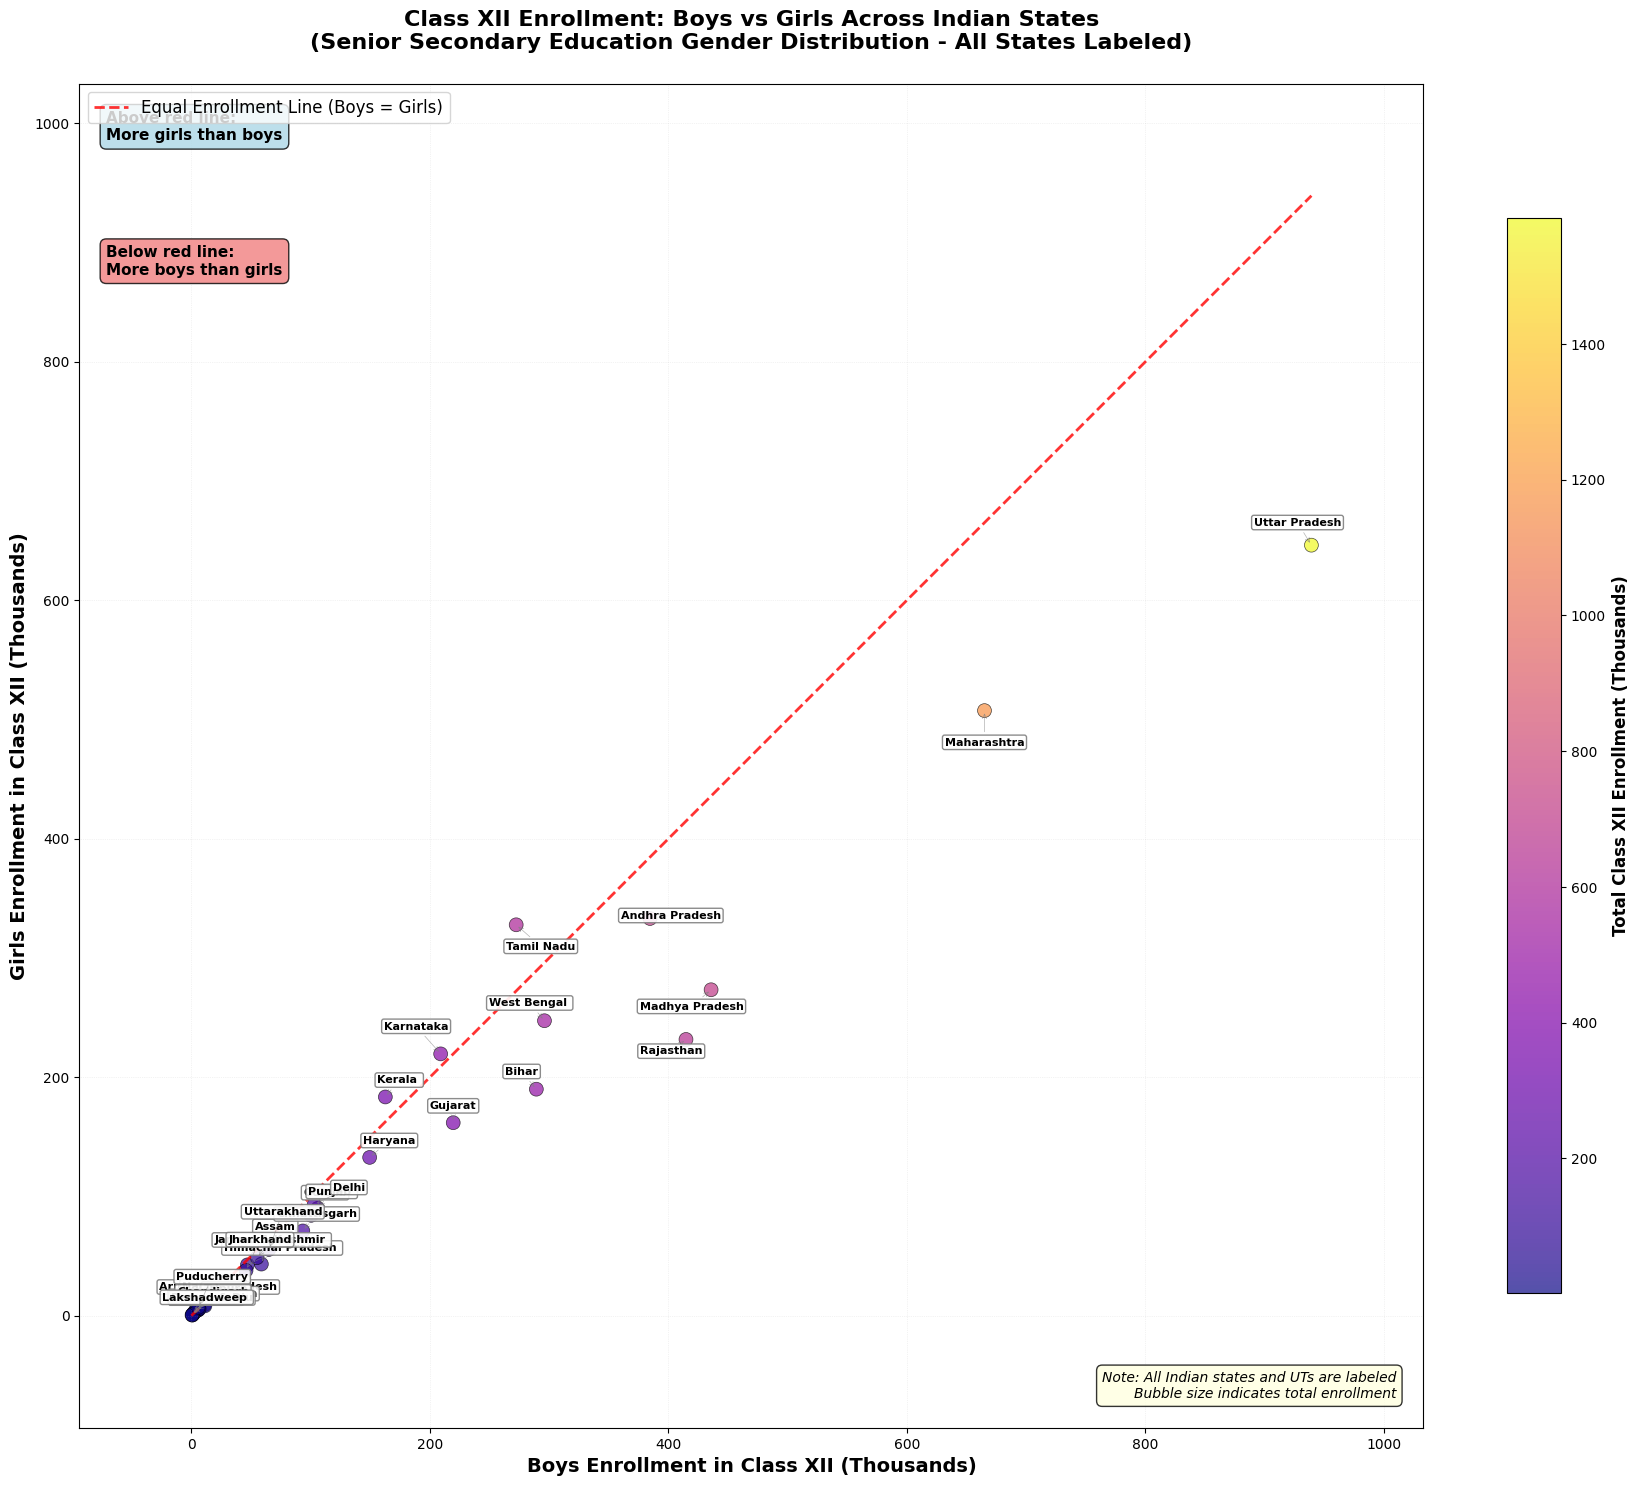

📊 Class XII Scatter Plot Analysis:
• Total boys enrolled: 5,177,645
• Total girls enrolled: 4,082,627
• Gender gap: 1,095,018 students (11.8%)
• Boys have higher enrollment nationally

📈 State Distribution:
• 10 states have more girls than boys in Class XII
• 25 states have more boys than girls in Class XII

States with more girls in Class XII (top 5 by difference):
  • Tamil Nadu: +55,464 more girls
  • Kerala : +20,811 more girls
  • Karnataka: +10,562 more girls
  • Puducherry: +1,163 more girls
  • Meghalaya: +867 more girls

States with more boys in Class XII (top 5 by difference):
  • Uttar Pradesh: +293,009 more boys
  • Rajasthan: +183,037 more boys
  • Madhya Pradesh: +162,451 more boys
  • Maharashtra: +157,609 more boys
  • Bihar: +99,292 more boys


In [19]:
# Create Class XII Boys vs Girls Scatter Plot with all state labels
# Try to import adjustText for better label positioning (optional)
try:
    from adjustText import adjust_text
    ADJUST_TEXT_AVAILABLE = True
except ImportError:
    ADJUST_TEXT_AVAILABLE = False
    print("Note: For optimal label positioning, install 'adjustText': pip install adjustText")

fig, ax = plt.subplots(figsize=(20, 16))  # Increased figure size for better visibility

# Create scatter plot with state names
scatter = ax.scatter(class_12_data['Class_XII_Boys']/1000, 
                    class_12_data['Class_XII_Girls']/1000,
                    c=class_12_data['Class_XII_Total']/1000,
                    cmap='plasma',
                    s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

# Add perfect parity line (y=x)
max_val = max(class_12_data['Class_XII_Boys'].max(), class_12_data['Class_XII_Girls'].max()) / 1000
ax.plot([0, max_val], [0, max_val], 'r--', linewidth=2, alpha=0.8, label='Equal Enrollment Line (Boys = Girls)')

# Add labels for ALL states with smart positioning to avoid overlap
if ADJUST_TEXT_AVAILABLE:
    # Use adjustText for optimal positioning
    texts = []
    for idx, row in class_12_data.iterrows():
        text = ax.text(row['Class_XII_Boys']/1000, row['Class_XII_Girls']/1000, row['State'],
                      fontsize=8, fontweight='bold', ha='center', va='center',
                      bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.9, edgecolor='gray'))
        texts.append(text)
    
    adjust_text(texts, 
               arrowprops=dict(arrowstyle='->', color='gray', alpha=0.7, lw=0.5),
               force_points=0.3, force_text=0.5,
               expand_points=(1.5, 1.5), expand_text=(1.3, 1.3))
else:
    # Manual positioning strategy for all states
    for idx, row in class_12_data.iterrows():
        x_pos = row['Class_XII_Boys']/1000
        y_pos = row['Class_XII_Girls']/1000
        
        # Calculate smart offset based on position and index to minimize overlap
        angle = (idx * 45) % 360  # Distribute angles
        radius = 15 + (idx % 3) * 5  # Vary radius slightly
        
        offset_x = radius * np.cos(np.radians(angle))
        offset_y = radius * np.sin(np.radians(angle))
        
        # Adjust for edge positions to keep labels within plot area
        if x_pos > max_val * 0.8:  # Right edge
            offset_x = min(offset_x, -10)
        elif x_pos < max_val * 0.2:  # Left edge
            offset_x = max(offset_x, 10)
            
        if y_pos > max_val * 0.8:  # Top edge
            offset_y = min(offset_y, -10)
        elif y_pos < max_val * 0.2:  # Bottom edge
            offset_y = max(offset_y, 10)
        
        ax.annotate(row['State'], 
                   (x_pos, y_pos),
                   xytext=(offset_x, offset_y), textcoords='offset points',
                   fontsize=8, fontweight='bold', ha='center',
                   bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.9, edgecolor='gray'),
                   arrowprops=dict(arrowstyle='->', color='gray', alpha=0.6, lw=0.5))

# Customize the plot
ax.set_xlabel('Boys Enrollment in Class XII (Thousands)', fontsize=14, fontweight='bold')
ax.set_ylabel('Girls Enrollment in Class XII (Thousands)', fontsize=14, fontweight='bold')
ax.set_title('Class XII Enrollment: Boys vs Girls Across Indian States\n(Senior Secondary Education Gender Distribution - All States Labeled)', 
             fontsize=16, fontweight='bold', pad=25)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
cbar.set_label('Total Class XII Enrollment (Thousands)', fontsize=12, fontweight='bold')

# Add grid and legend
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.5)
ax.legend(fontsize=12, loc='upper left')

# Extend plot limits to accommodate labels
x_margin = max_val * 0.1
y_margin = max_val * 0.1
ax.set_xlim(-x_margin, max_val + x_margin)
ax.set_ylim(-y_margin, max_val + y_margin)

# Add interpretation boxes with adjusted positions
ax.text(0.02, 0.98, 'Above red line:\nMore girls than boys', 
        transform=ax.transAxes, fontsize=11, 
        bbox=dict(boxstyle="round,pad=0.4", facecolor="lightblue", alpha=0.8),
        verticalalignment='top', fontweight='bold')

ax.text(0.02, 0.88, 'Below red line:\nMore boys than girls', 
        transform=ax.transAxes, fontsize=11,
        bbox=dict(boxstyle="round,pad=0.4", facecolor="lightcoral", alpha=0.8),
        verticalalignment='top', fontweight='bold')

# Add note about the visualization
ax.text(0.98, 0.02, 'Note: All Indian states and UTs are labeled\nBubble size indicates total enrollment', 
        transform=ax.transAxes, fontsize=10,
        bbox=dict(boxstyle="round,pad=0.4", facecolor="lightyellow", alpha=0.8),
        verticalalignment='bottom', horizontalalignment='right', style='italic')

# Adjust layout with more padding for labels
plt.subplots_adjust(left=0.08, bottom=0.08, right=0.92, top=0.92)
plt.show()

# Analysis summary
print("📊 Class XII Scatter Plot Analysis:")
print("=" * 50)

# Calculate basic gender statistics
boys_total = class_12_data['Class_XII_Boys'].sum()
girls_total = class_12_data['Class_XII_Girls'].sum()
gender_gap = abs(boys_total - girls_total)
percent_gap = (gender_gap / (boys_total + girls_total)) * 100

print(f"• Total boys enrolled: {boys_total:,.0f}")
print(f"• Total girls enrolled: {girls_total:,.0f}")
print(f"• Gender gap: {gender_gap:,.0f} students ({percent_gap:.1f}%)")
print(f"• {'Boys' if boys_total > girls_total else 'Girls'} have higher enrollment nationally")

# States above and below parity line
above_line = class_12_data[class_12_data['Class_XII_Girls'] > class_12_data['Class_XII_Boys']]
below_line = class_12_data[class_12_data['Class_XII_Boys'] > class_12_data['Class_XII_Girls']]

print(f"\n📈 State Distribution:")
print(f"• {len(above_line)} states have more girls than boys in Class XII")
print(f"• {len(below_line)} states have more boys than girls in Class XII")

if len(above_line) > 0:
    print(f"\nStates with more girls in Class XII (top 5 by difference):")
    girls_advantage = above_line.copy()
    girls_advantage['Girls_Advantage'] = girls_advantage['Class_XII_Girls'] - girls_advantage['Class_XII_Boys']
    for _, row in girls_advantage.nlargest(5, 'Girls_Advantage').iterrows():
        print(f"  • {row['State']}: +{row['Girls_Advantage']:,.0f} more girls")

if len(below_line) > 0:
    print(f"\nStates with more boys in Class XII (top 5 by difference):")
    boys_advantage = below_line.copy()
    boys_advantage['Boys_Advantage'] = boys_advantage['Class_XII_Boys'] - boys_advantage['Class_XII_Girls']
    for _, row in boys_advantage.nlargest(5, 'Boys_Advantage').iterrows():
        print(f"  • {row['State']}: +{row['Boys_Advantage']:,.0f} more boys")

In [13]:
# Create an interactive Class XII scatter plot using Plotly
fig_class12 = px.scatter(class_12_data, 
                         x='Class_XII_Boys', 
                         y='Class_XII_Girls',
                         size='Class_XII_Total',
                         color='Class_XII_Total',
                         hover_name='State',
                         hover_data={
                             'Class_XII_Boys': ':,.0f',
                             'Class_XII_Girls': ':,.0f',
                             'Class_XII_Total': ':,.0f'
                         },
                         color_continuous_scale='Viridis',
                         title='Interactive Class XII Enrollment: Boys vs Girls by State',
                         labels={
                             'Class_XII_Boys': 'Boys Enrollment (Class XII)',
                             'Class_XII_Girls': 'Girls Enrollment (Class XII)',
                             'Class_XII_Total': 'Total Enrollment (Class XII)'
                         })

# Add perfect parity line
max_val_12 = max(class_12_data['Class_XII_Boys'].max(), class_12_data['Class_XII_Girls'].max())
fig_class12.add_shape(
    type="line",
    x0=0, y0=0, x1=max_val_12, y1=max_val_12,
    line=dict(color="red", width=3, dash="dash"),
    name="Equal Enrollment"
)

# Update layout
fig_class12.update_layout(
    width=900,
    height=700,
    showlegend=True,
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14
)

# Add annotations
fig_class12.add_annotation(
    x=0.02, y=0.98,
    xref="paper", yref="paper",
    text="Above line: More Girls<br>Below line: More Boys<br>Bubble size = Total Enrollment",
    showarrow=False,
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="black",
    borderwidth=1,
    font=dict(size=12)
)

fig_class12.show()

# Detailed state-wise analysis table
print("\n📋 DETAILED CLASS XII ENROLLMENT BY STATE")
print("=" * 70)

# Create a comprehensive analysis table
analysis_table = class_12_data[['State', 'Class_XII_Boys', 'Class_XII_Girls', 'Class_XII_Total']].copy()
analysis_table['Gender_Difference'] = analysis_table['Class_XII_Boys'] - analysis_table['Class_XII_Girls']
analysis_table['Percent_Boys'] = (analysis_table['Class_XII_Boys'] / analysis_table['Class_XII_Total'] * 100).round(1)
analysis_table['Percent_Girls'] = (analysis_table['Class_XII_Girls'] / analysis_table['Class_XII_Total'] * 100).round(1)
analysis_table['Gender_Status'] = analysis_table['Gender_Difference'].apply(
    lambda x: 'More Boys' if x > 0 else 'More Girls' if x < 0 else 'Equal'
)

# Sort by total enrollment
analysis_table = analysis_table.sort_values('Class_XII_Total', ascending=False)

print("Top 15 States by Class XII Enrollment:")
print("-" * 70)
print(f"{'Rank':<4} {'State':<20} {'Boys':<8} {'Girls':<8} {'Total':<8} {'Gap':<8} {'Status':<12}")
print("-" * 70)

for i, (_, row) in enumerate(analysis_table.head(15).iterrows(), 1):
    gap = abs(row['Gender_Difference'])
    print(f"{i:<4} {row['State']:<20} {row['Class_XII_Boys']:<8,.0f} {row['Class_XII_Girls']:<8,.0f} "
          f"{row['Class_XII_Total']:<8,.0f} {gap:<8,.0f} {row['Gender_Status']:<12}")

# Summary insights
print(f"\n🎯 KEY INSIGHTS FROM CLASS XII ANALYSIS:")
print("-" * 50)

# Calculate correlation
correlation = class_12_data['Class_XII_Boys'].corr(class_12_data['Class_XII_Girls'])
print(f"• Strong correlation between boys and girls enrollment: {correlation:.3f}")

# Find most balanced states
analysis_table['Balance_Score'] = abs(analysis_table['Percent_Boys'] - 50.0)
most_balanced = analysis_table.nsmallest(5, 'Balance_Score')
print(f"\n🏆 Most Gender-Balanced States in Class XII:")
for _, row in most_balanced.iterrows():
    print(f"  • {row['State']}: {row['Percent_Boys']:.1f}% Boys, {row['Percent_Girls']:.1f}% Girls")

# States with highest gender imbalance
most_imbalanced = analysis_table.nlargest(5, 'Balance_Score')
print(f"\n⚠️ States with Highest Gender Imbalance in Class XII:")
for _, row in most_imbalanced.iterrows():
    dominant = 'Boys' if row['Percent_Boys'] > 50 else 'Girls'
    print(f"  • {row['State']}: {row['Percent_Boys']:.1f}% Boys, {row['Percent_Girls']:.1f}% Girls ({dominant} dominant)")

print(f"\n💡 INTERPRETATION:")
print("• Points near the diagonal line indicate balanced gender enrollment")
print("• Distance from the line shows the magnitude of gender disparity") 
print("• Larger bubbles represent states with higher total Class XII enrollment")
print("• This direct comparison reveals enrollment patterns without ratio calculations")


📋 DETAILED CLASS XII ENROLLMENT BY STATE
Top 15 States by Class XII Enrollment:
----------------------------------------------------------------------
Rank State                Boys     Girls    Total    Gap      Status      
----------------------------------------------------------------------
1    Uttar Pradesh        939,129  646,120  1,585,249 293,009  More Boys   
2    Maharashtra          665,003  507,394  1,172,397 157,609  More Boys   
3    Andhra Pradesh       384,544  333,078  717,622  51,466   More Boys   
4    Madhya Pradesh       435,771  273,320  709,091  162,451  More Boys   
5    Rajasthan            414,707  231,670  646,377  183,037  More Boys   
6    Tamil Nadu           272,336  327,800  600,136  55,464   More Girls  
7    West Bengal          296,039  247,359  543,398  48,680   More Boys   
8    Bihar                289,240  189,948  479,188  99,292   More Boys   
9    Karnataka            209,008  219,570  428,578  10,562   More Girls  
10   Gujarat             